#### Problem Statement

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection  import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn import metrics
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("C:/Users/Hrushikesh/Desktop/Data-Science-ML-Capstone-Projects-master/baseball.csv")
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


The dataset contains 16 features which contaions statistical summary of the Baseball players and other features is our targer variable. Here W is our target variable which predict the number of wins. we can also observe that the dataset has only numerical values and no columns has categorical data. And we can say that it is a regression type problem statement

In [3]:
data.shape

(30, 17)

The dataset contain 30 rows and 17 columns including target variable

In [4]:
data.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

#### Observations:-

1) Here all the columns has integer datatype except the ERA column which is float datatype.

2) Here there is no object datatype so no categorical data and no need to encode the data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [6]:
data.isna().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

There is no missing values in the dataset.

<AxesSubplot:>

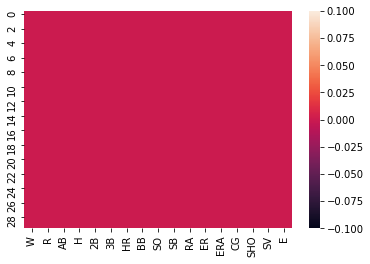

In [7]:
sns.heatmap(data.isna())

This visualization clkears that there is no null values present in the dataset

In [8]:
data['W'].unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

These are the unique values in the target variables

In [9]:
data['W'].value_counts()

68     3
83     2
74     2
76     2
81     2
64     1
93     1
92     1
90     1
88     1
87     1
86     1
85     1
84     1
80     1
97     1
100    1
78     1
63     1
79     1
71     1
67     1
98     1
95     1
Name: W, dtype: int64

This is the list of the values of target variables which has int datatype

In [10]:
data.loc[data['W']==""]

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E


And we can see there is no space in the dataset

In [11]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


#### This is the statistical summary of the dataset. From the above observations we can conclude that

1) The count of the each column is same, sso there are no null values present in the dataset.

2) In target variable the mean is littele less than median it means it is left skewed.

3) The mean of the target variable is 80.96 and max is 100 so teams won more matches.

3) The R column the mean is more than median it means that it is also left skewed.

4) same difference can also seen in columns['2B','BB','SO','RA','ER','ERA','SHO'].it is also skewed from left.

5) In columns 3B and SB and medianb is same so the data is normal and symmetrical.

6) There is huge differences in max and 70% percentile(3rd quantile)

7)Above observatrions conclude that the outliers present in the many of these columns

# Data Visualization

<AxesSubplot:xlabel='W', ylabel='Count'>

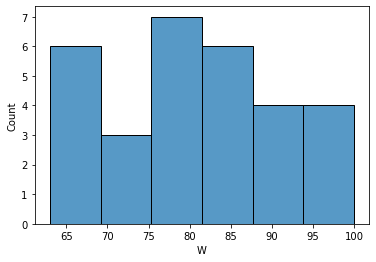

In [12]:
#visualizing heatmap of ther target variable
sns.histplot(data['W'])

From the above visualization we can say that the target variable has normalised data and there is no presence of skewness. The minimum win of the team rate is 63% and maximum is 100. The mean of wins of team rate is 80. The win of the team is more between 75 to 80 and less in between 70 to 75

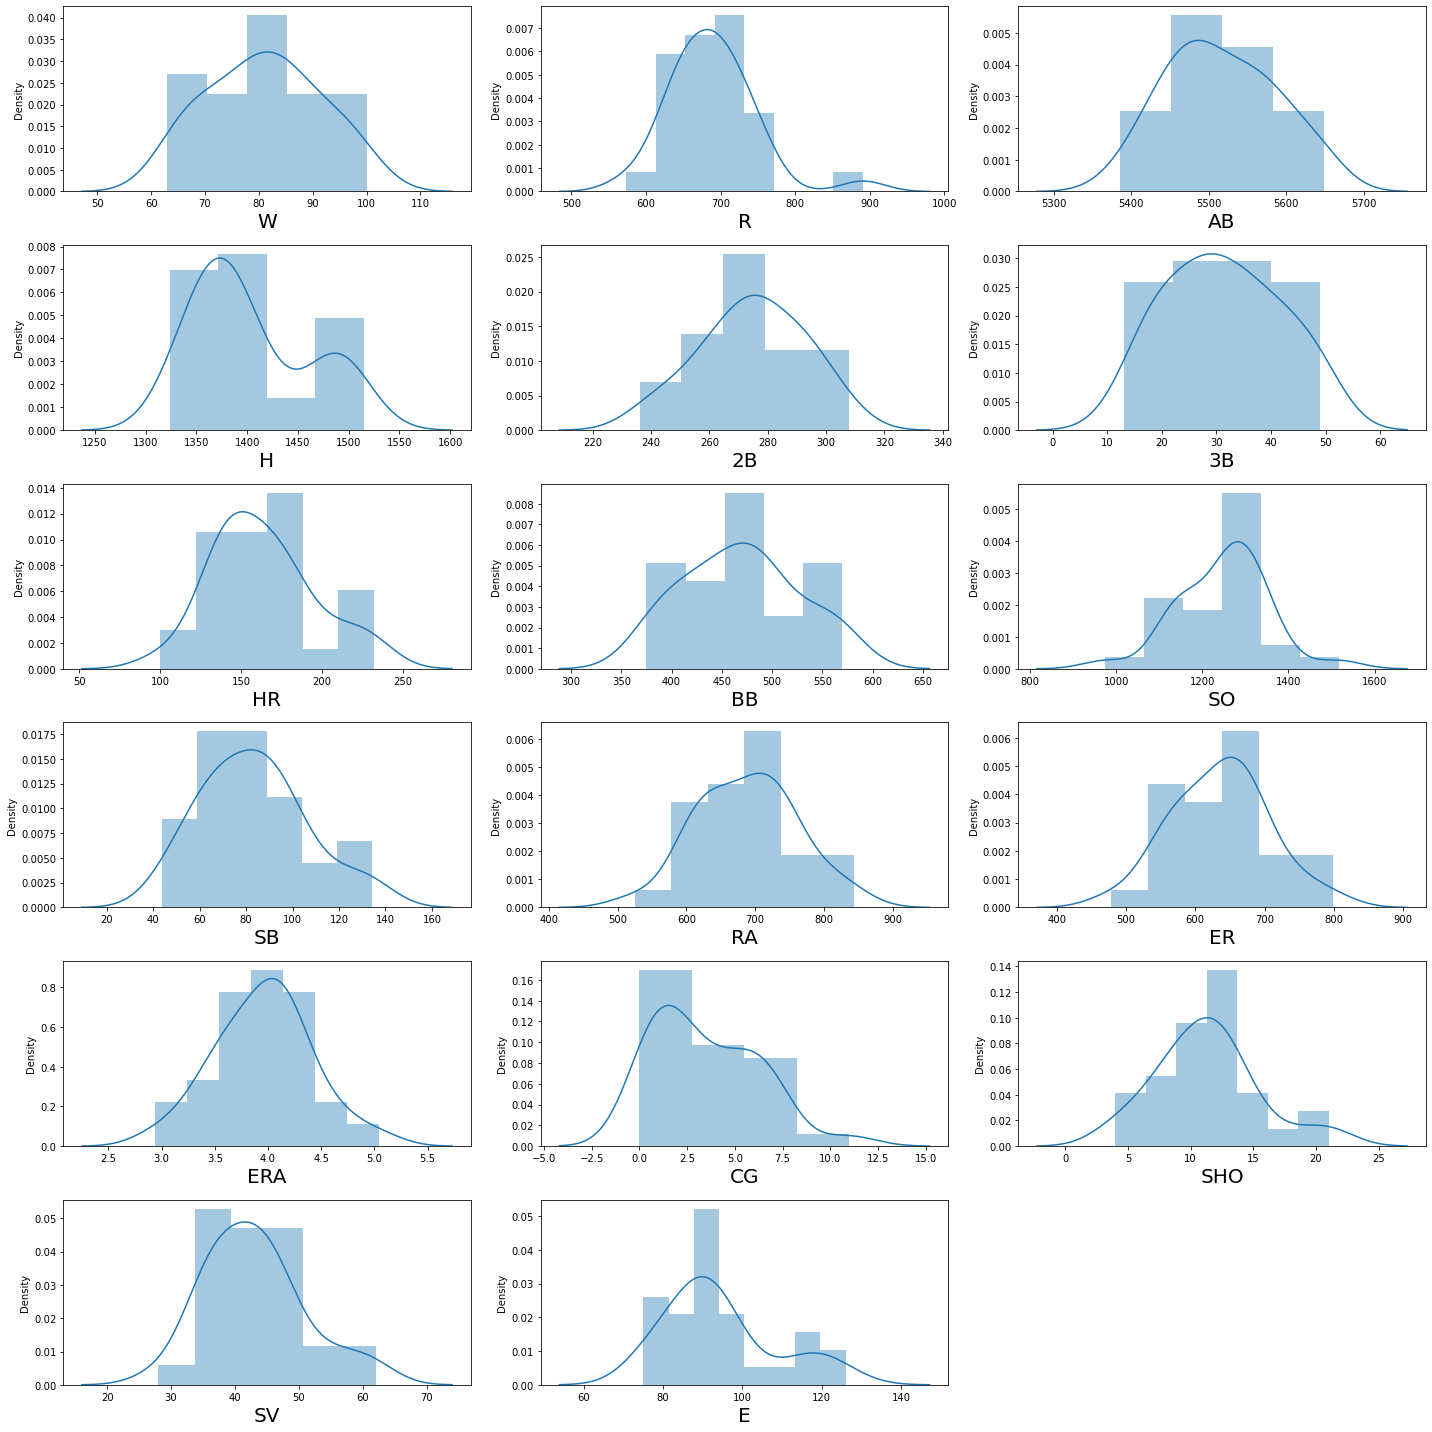

In [13]:
#Checking how the data is distributed in each column
plt.figure(figsize=(20,20), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

From the above distribution plot, it is observe that most of the data is normally distributed annd vrery few has skewness

1) The target variable W is normally distributed and is no skewness.

2) R is not normaly distributed and is left skewed.

3) The same difference is seen in BB, SO, RA, ERA, SHO. Although they look normal but has skewness.

4) The Column AB looks normally distributed and has no skewness

5) The column H, HR, SV, E are not normal and they skewed to the right.

6) The 2B looks normally distributed but skewness is present.

7) The distribution of the data present in the columns '3B','SB','Cg', and 'ER' is normal and has no skewness.

Text(0, 0.5, 'Errors')

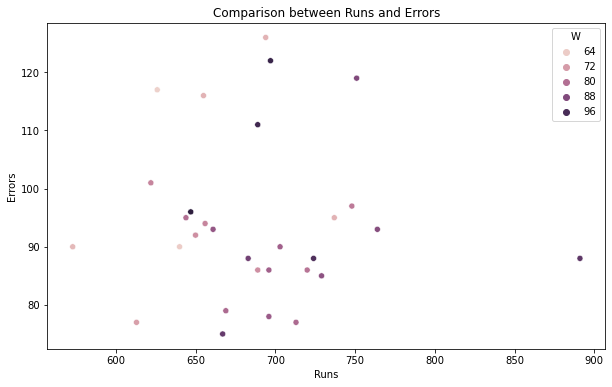

In [14]:
# Checking the relation between two variables
plt.figure(figsize=[10,6])
plt.title('Comparison between Runs and Errors')
sns.scatterplot(data['R'],data['E'],hue=data['W'])
plt.xlabel('Runs')
plt.ylabel('Errors')

The scatterplot gives the relation between runs and errors with respect to Wins. There is no linear relationship between the columns and there is no correlation.

Text(0, 0.5, 'Hits')

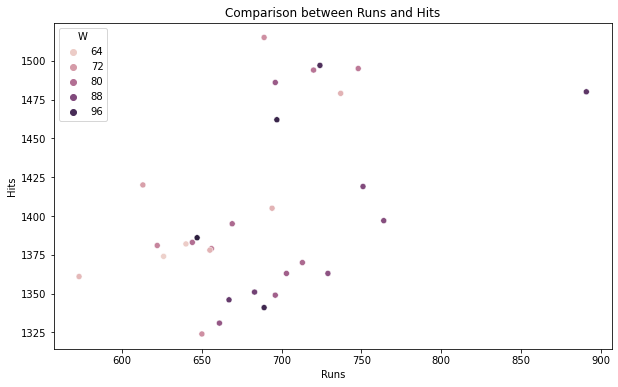

In [15]:
# Checking the relation between two variables
plt.figure(figsize=[10,6])
plt.title('Comparison between Runs and Hits')
sns.scatterplot(data['R'],data['H'],hue=data['W'])
plt.xlabel('Runs')
plt.ylabel('Hits')

There is no linearity between these columns. The rate of runs is high in the range of 650 to 750 with the rate of hitsb ranges 1500, which means win of the team is more in this range

Text(0, 0.5, 'Hits')

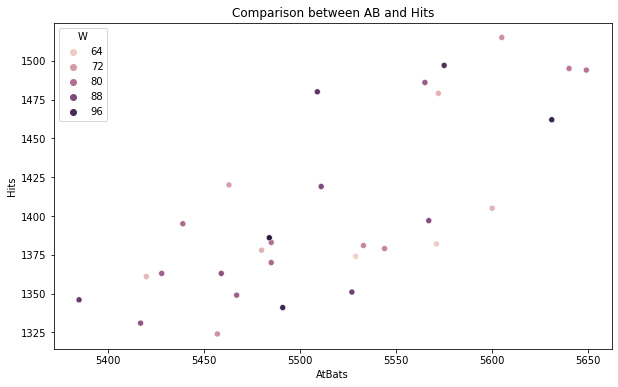

In [16]:
# Checking the relation between two variables
plt.figure(figsize=[10,6])
plt.title('Comparison between AB and Hits')
sns.scatterplot(data['AB'],data['H'],hue=data['W'])
plt.xlabel('AtBats')
plt.ylabel('Hits')

There is a weak relationship between features. As the AB rates increases with the rate of hits, then win of team also increases

Text(0, 0.5, 'Earneds Runs Average')

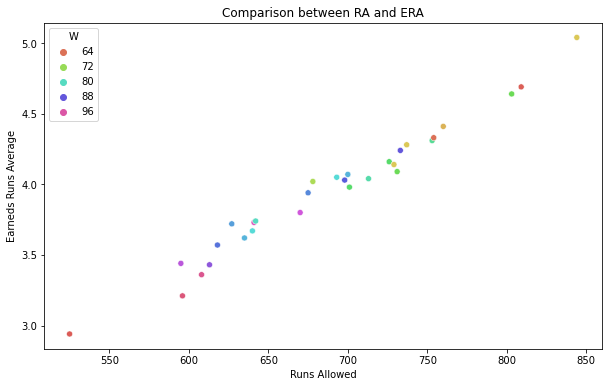

In [17]:
# Checking the relation between two variables
plt.figure(figsize=[10,6])
plt.title('Comparison between RA and ERA')
sns.scatterplot(data['RA'],data['ERA'],hue=data['W'],palette='hls')
plt.xlabel('Runs Allowed')
plt.ylabel('Earneds Runs Average')

From the above plot, it is seen that their is a strong relationship between these columns. As the Runs allowed increases ERA also increases which leads to increase in winning rate

Text(0, 0.5, 'Wins')

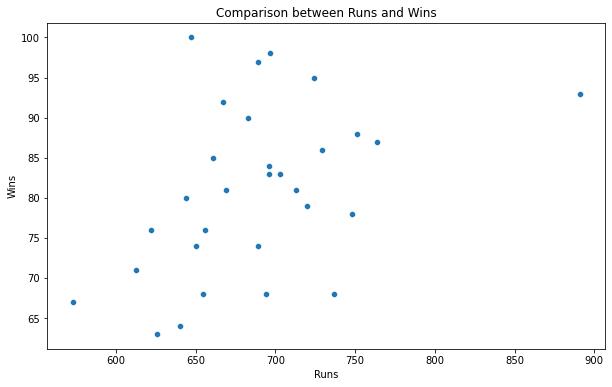

In [18]:
# Checking the relation between two variables
plt.figure(figsize=[10,6])
plt.title('Comparison between Runs and Wins')
sns.scatterplot(data['R'],data['W'])
plt.xlabel('Runs')
plt.ylabel('Wins')

From the above plot we can say that as the run rate increases wins also increases

Text(0, 0.5, 'Wins')

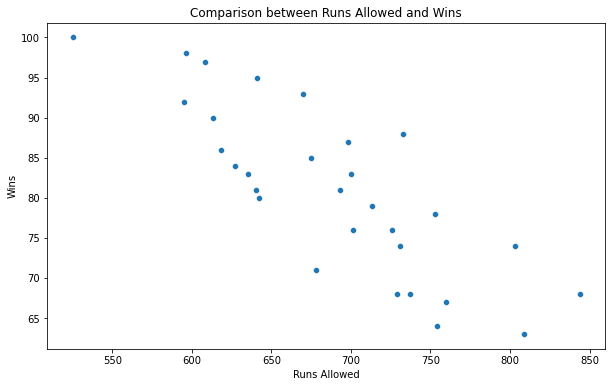

In [19]:
# Checking the relation between two variables
plt.figure(figsize=[10,6])
plt.title('Comparison between Runs Allowed and Wins')
sns.scatterplot(data['RA'],data['W'])
plt.xlabel('Runs Allowed')
plt.ylabel('Wins')

Here we can observe that their is negative linear relationship between Runs Allowed and wins. As the data falls from left to right it means that the target variable with RA column

Text(0, 0.5, 'Wins')

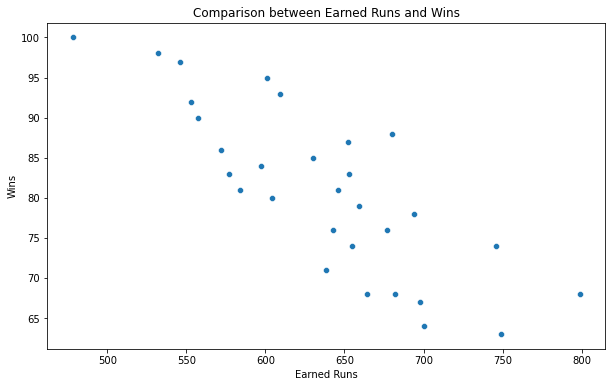

In [20]:
# Checking the relation between two variables
plt.figure(figsize=[10,6])
plt.title('Comparison between Earned Runs and Wins')
sns.scatterplot(data['ER'],data['W'])
plt.xlabel('Earned Runs')
plt.ylabel('Wins')

Same observation with ER too. Their is negative relationship with target variable

Text(0, 0.5, 'Wins')

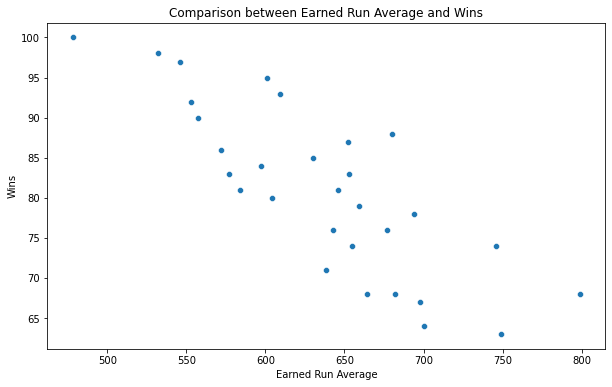

In [21]:
# Checking the relation between two variables
plt.figure(figsize=[10,6])
plt.title('Comparison between Earned Run Average and Wins')
sns.scatterplot(data['ER'],data['W'])
plt.xlabel('Earned Run Average')
plt.ylabel('Wins')

Same observation with ERA too. Their is negative relationship with target variable

Text(0, 0.5, 'Earned Run Average')

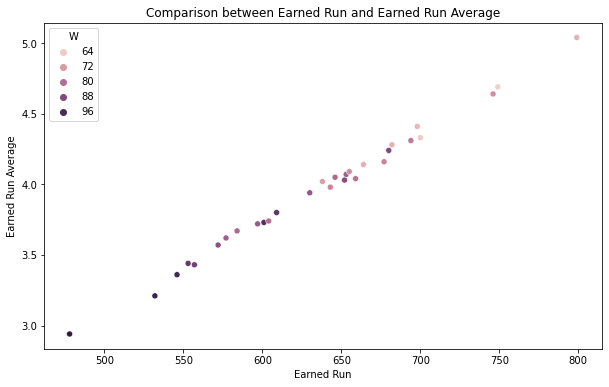

In [22]:
# Checking the relation between two variables
plt.figure(figsize=[10,6])
plt.title('Comparison between Earned Run and Earned Run Average')
sns.scatterplot(data['ER'],data['ERA'],hue=data['W'])
plt.xlabel('Earned Run')
plt.ylabel('Earned Run Average')

As we can see their is a strong linear relationship between feature. As ER increases ERA also increases

Text(0, 0.5, 'Wins')

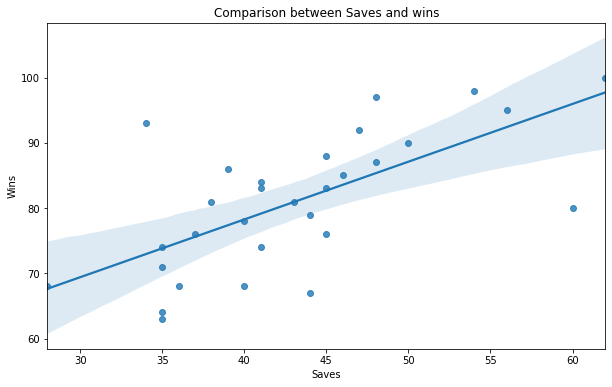

In [23]:
# Checking the relation between two variables
plt.figure(figsize=[10,6])
plt.title('Comparison between Saves and wins')
sns.regplot(data['SV'],data['W'])
plt.xlabel('Saves')
plt.ylabel('Wins')

As we can see their is a strong positive linear relation between saves and wins

Text(0, 0.5, 'Wins')

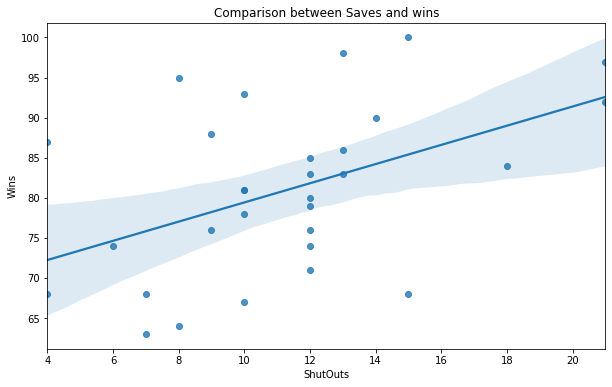

In [24]:
# Checking the relation between two variables
plt.figure(figsize=[10,6])
plt.title('Comparison between Saves and wins')
sns.regplot(data['SHO'],data['W'])
plt.xlabel('ShutOuts')
plt.ylabel('Wins')

There is no much linearity between the feature and the label. In some of the datapoints, we can see whenever shoutouts is high, there is a chance of win.



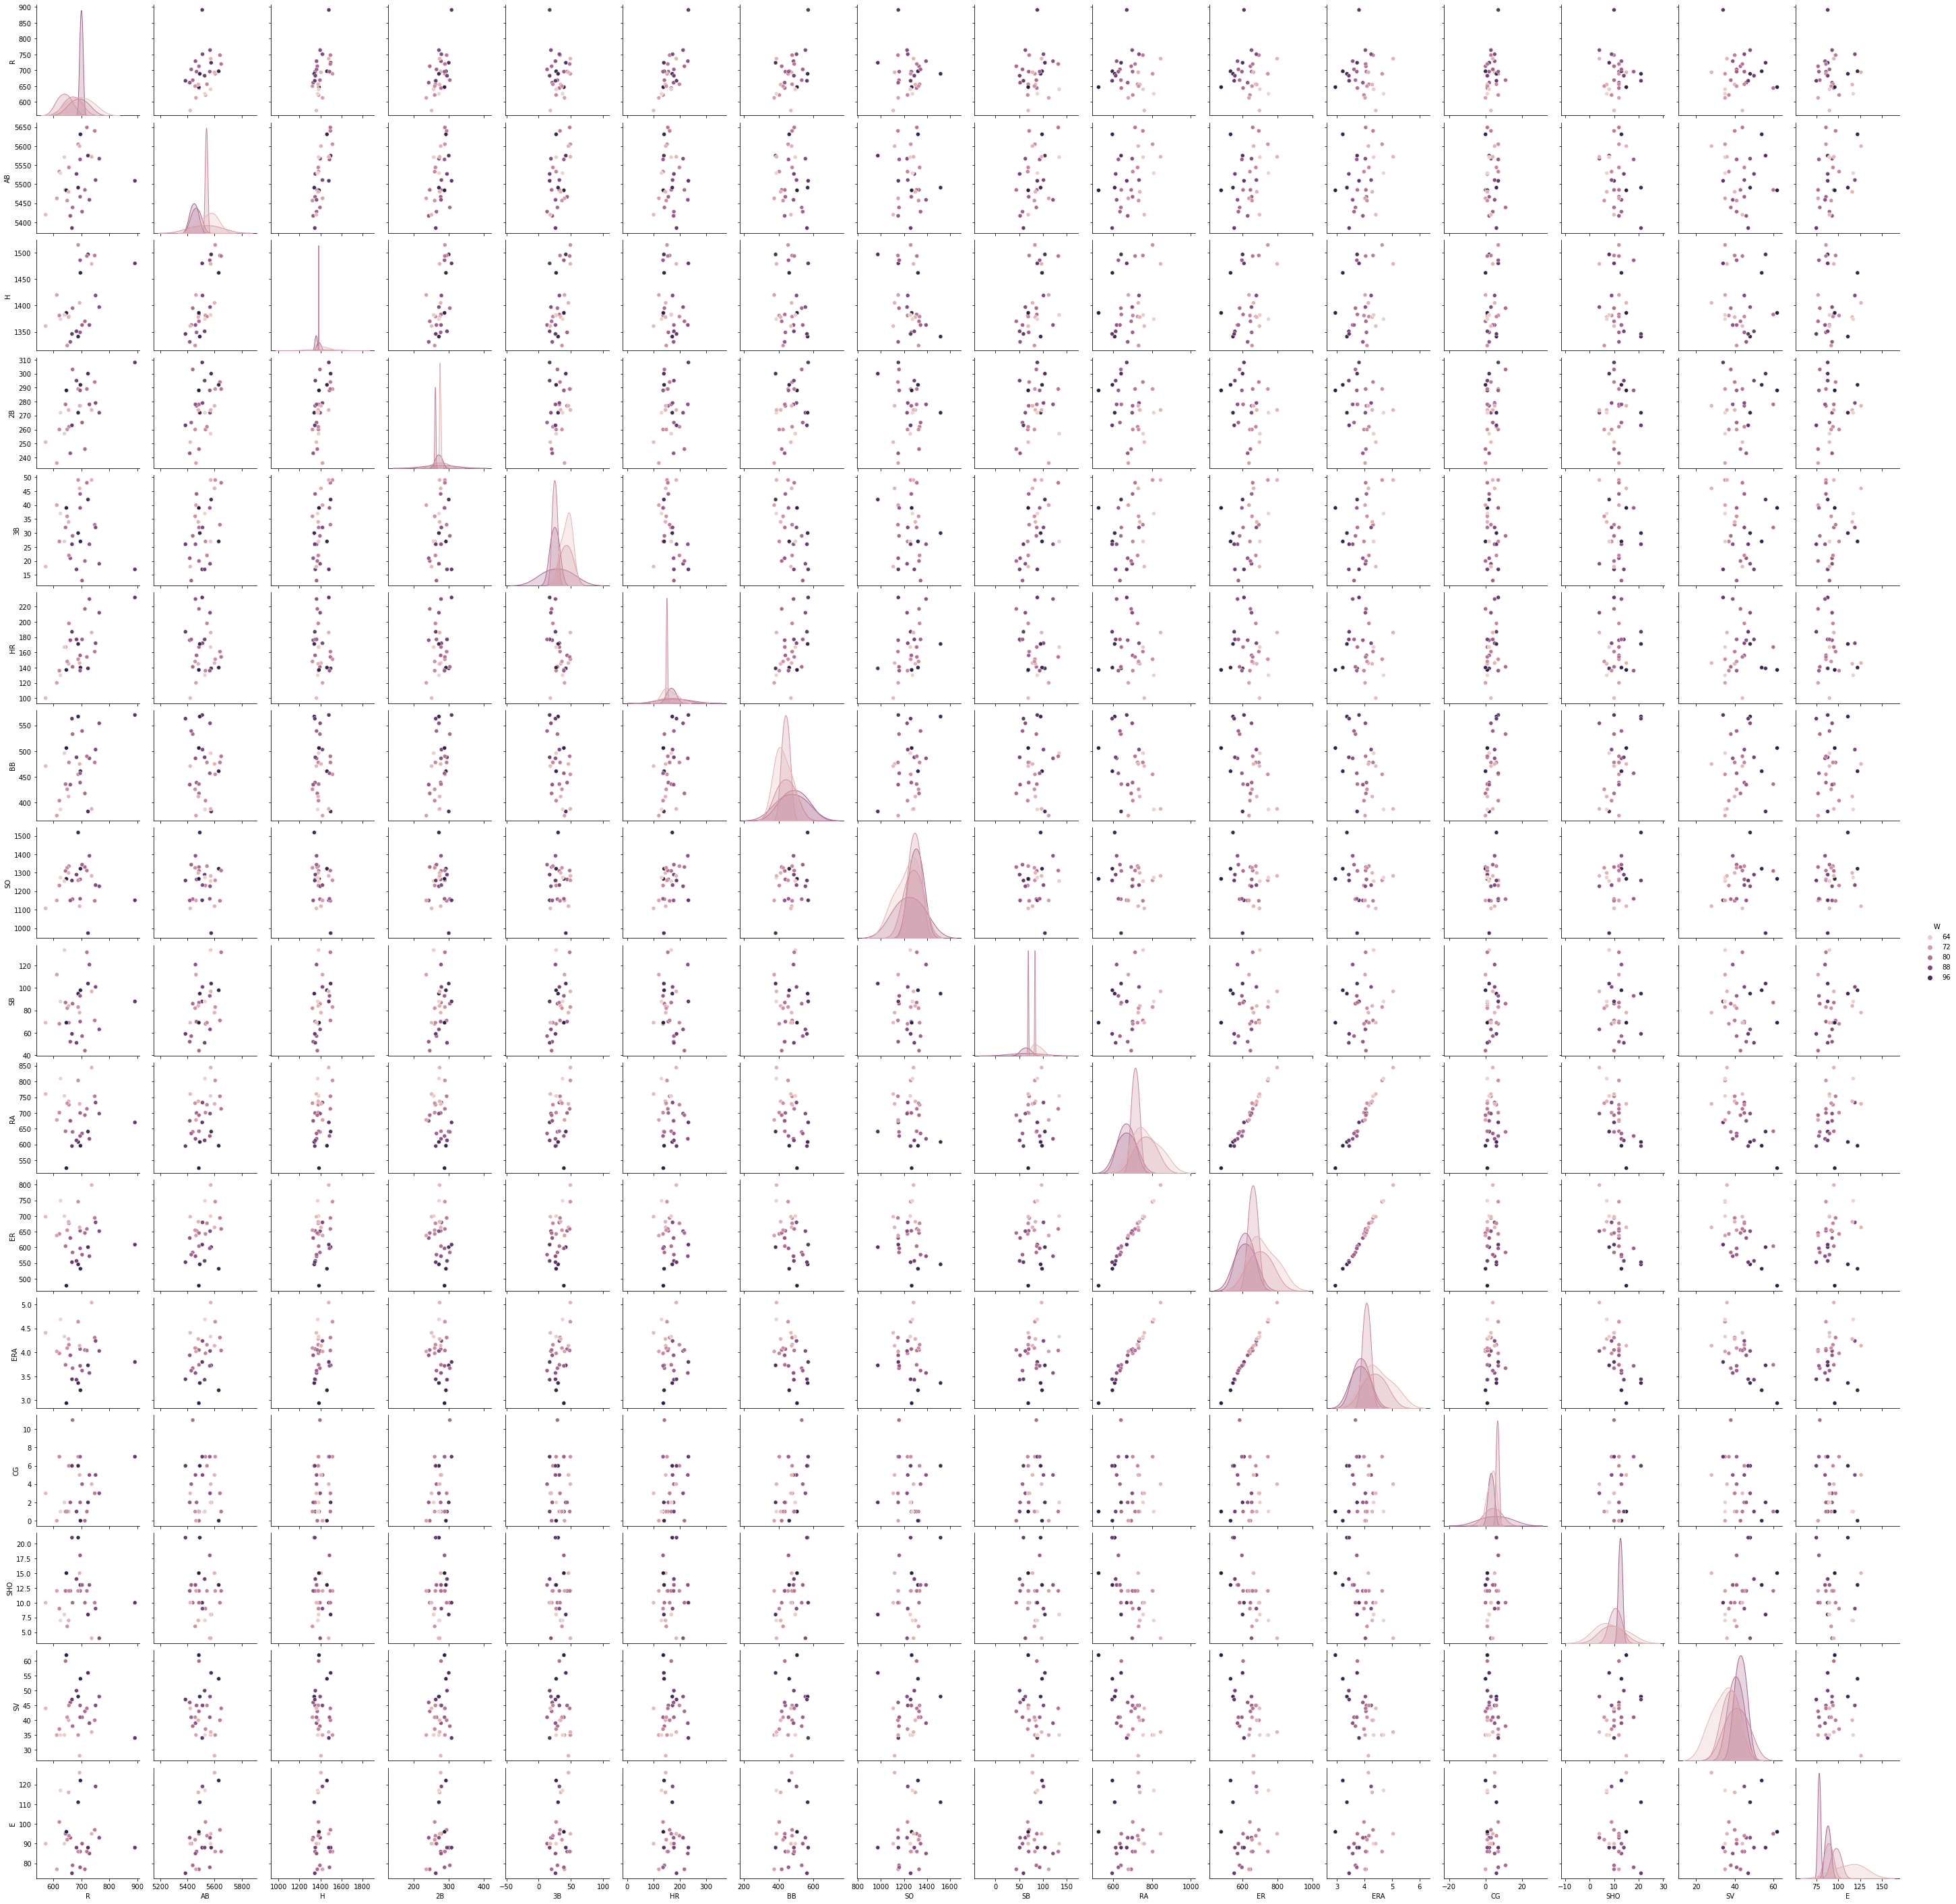

In [25]:
sns.pairplot(data,hue='W')

# Correlation

In [26]:
data.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

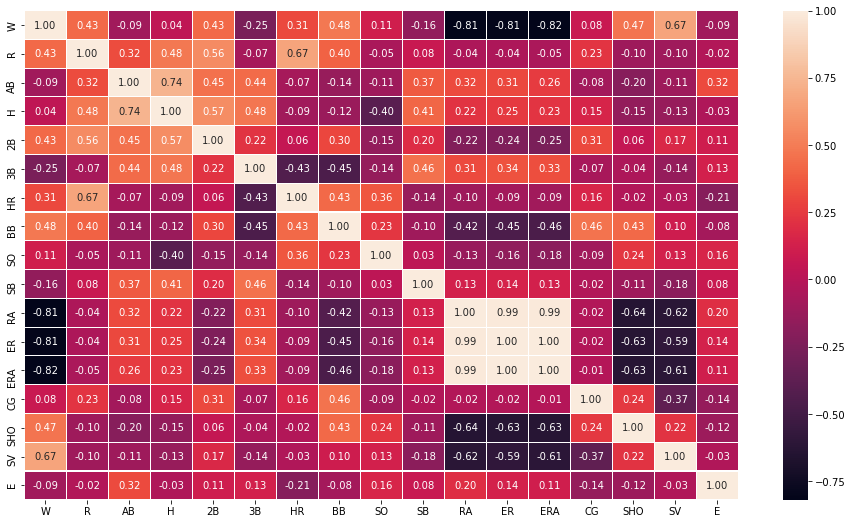

In [27]:
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(),annot=True,linewidths=0.1,fmt='0.2f')

The Correlation consist of both positive and negative correlation

1) The target variable W is positively correlated R, 2B, HR, BB, SHO, SV

2) The target variable W is negatively correlated RA,ER,ERA

3) The target variable W is also negatively correlated SB, 3B, AB, E

4) Apart from features and labels correlation, We can also observe that the features ERA, Er and RA are highly positively correlated with each other which can create multicolinearity problem.

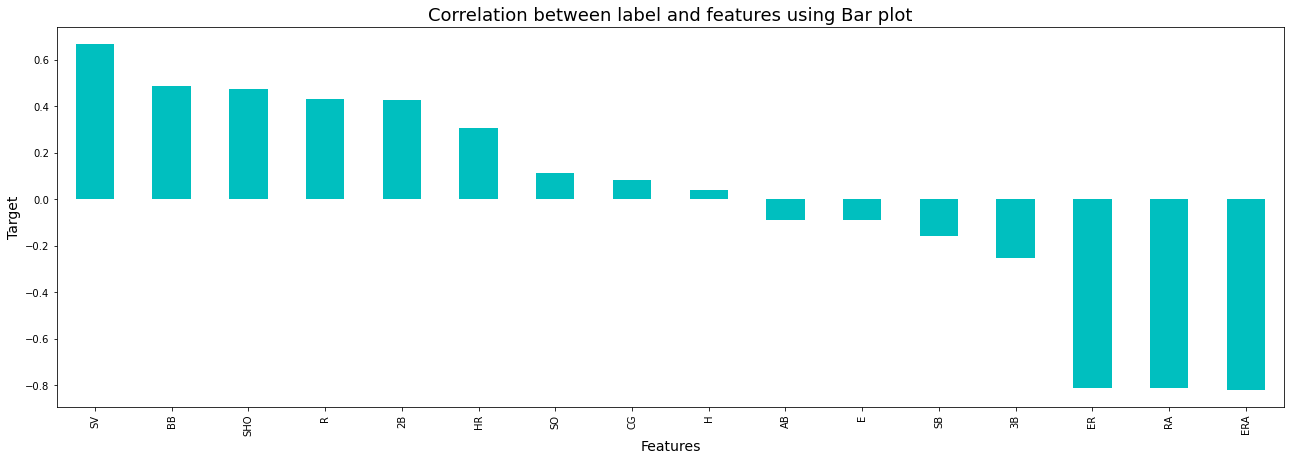

In [28]:
plt.figure(figsize=(22,7))
data.corr()['W'].sort_values(ascending=False).drop(['W']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation between label and features using Bar plot', fontsize=18)
plt.show()

From the visualization, we can see that the features 'H' and 'CG' has very less correlation with the target variable. So,we can drop these columns. 

In [29]:
data.drop('H',axis=1,inplace=True)
data.drop('CG',axis=1,inplace=True)

In [30]:
data.head()

,W,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,SHO,SV,E
0,95,724,5575,300,42,139,383,973,104,641,601,3.73,8,56,88
1,83,696,5467,277,44,156,439,1264,70,700,653,4.07,12,45,86
2,81,669,5439,303,29,141,533,1157,86,640,584,3.67,10,38,79
3,76,622,5533,260,27,136,404,1231,68,701,643,3.98,9,37,101
4,74,689,5605,289,49,151,455,1259,83,803,746,4.64,12,35,86


In [31]:
data.shape

(30, 15)

# Checking Outliers

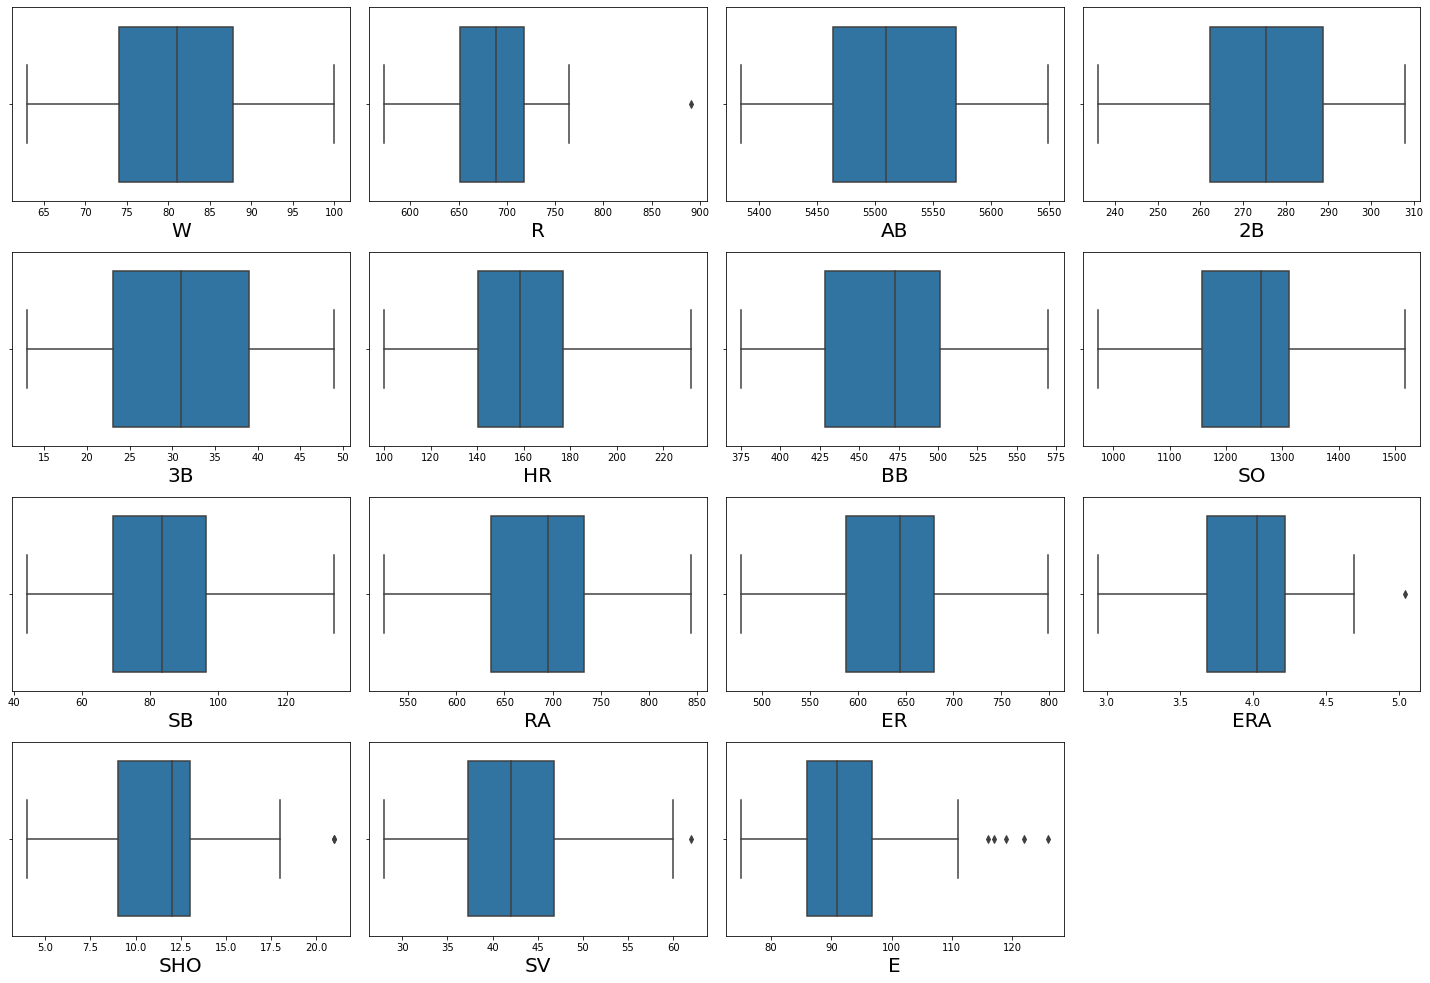

In [32]:
plt.figure(figsize=(20,20), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=15:
        ax = plt.subplot(6,4,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

From the above visualization, we can observe that the column R, ERA, SHO, SV, and E has outliers. So, removing the outliers using zscore and IQR technique before building the model.

# Removing Outliers

In [33]:
features = data[['R','ERA','SHO','SV','E']]

In [34]:
from scipy.stats import zscore
z= np.abs(zscore(features))
z

array([[0.61907797, 0.50695519, 0.81462859, 1.67160651, 0.46146963],
       [0.13443166, 0.25459752, 0.1728    , 0.24987932, 0.60719689],
       [0.33290586, 0.64134684, 0.32091429, 0.65485616, 1.11724227],
       [1.14641931, 0.05301004, 0.56777144, 0.78410408, 0.48575751],
       [0.01327008, 1.53131824, 0.1728    , 1.04259994, 0.60719689],
       [3.50964704, 0.35016492, 0.32091429, 1.17184786, 0.46146963],
       [1.31142984, 0.16500309, 1.80205719, 0.6376231 , 0.0971515 ],
       [0.4286812 , 0.20980031, 0.32091429, 0.00861653, 1.26296953],
       [0.76562578, 0.48455658, 0.1728    , 2.18859821, 0.04857575],
       [1.03448909, 0.79216414, 0.32091429, 0.39636031, 0.194303  ],
       [1.08641548, 0.63537388, 0.56777144, 0.24987932, 1.79730279],
       [0.70562195, 0.86533293, 0.41965715, 0.52560823, 0.68006051],
       [0.47137623, 0.03658439, 0.1728    , 0.37912725, 0.0971515 ],
       [0.55792022, 0.45618501, 0.1728    , 0.24987932, 0.02428788],
       [0.09981406, 0.41138779, 0.

In [35]:
new_data = data[(z<3).all(axis=1)]
new_data

,W,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,SHO,SV,E
0,95,724,5575,300,42,139,383,973,104,641,601,3.73,8,56,88
1,83,696,5467,277,44,156,439,1264,70,700,653,4.07,12,45,86
2,81,669,5439,303,29,141,533,1157,86,640,584,3.67,10,38,79
3,76,622,5533,260,27,136,404,1231,68,701,643,3.98,9,37,101
4,74,689,5605,289,49,151,455,1259,83,803,746,4.64,12,35,86
6,87,764,5567,272,19,212,554,1227,63,698,652,4.03,4,48,93
7,81,713,5485,246,20,217,418,1331,44,693,646,4.05,10,43,77
8,80,644,5485,278,32,167,436,1310,87,642,604,3.74,12,60,95
9,78,748,5640,294,33,161,478,1148,71,753,694,4.31,10,40,97
10,88,751,5511,279,32,172,503,1233,101,733,680,4.24,9,45,119


In [36]:
print(data.shape)
print(new_data.shape)

(30, 15)
(29, 15)


In [37]:
data_loss = (30-29)/30*100
data_loss

3.3333333333333335

So, using zscore the data loss is not more. Now checking with IQR technique

# IQR

In [38]:
# 1st quantile
Q1 = features.quantile(0.25)

# 3rd Quantile
Q3 = features.quantile(0.75)

#IQR
IQR = Q3-Q1

data1 = data[~((data<(Q1-1.5*IQR)) | (data>(Q3+1.5*IQR))).any(axis=1)]


In [39]:
print(data.shape)
print(data1.shape)

(30, 15)
(20, 15)


There is a huge data loss using IQR, so we will consider Zscore method.


In [40]:
new_data.skew()

W      0.119013
R     -0.215364
AB     0.169573
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

The skewness is present in the columns SHO,SV, E

In [41]:
skewed_features = ["SHO","SV","E"]



from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''


"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [42]:

new_data[skewed_features] = scaler.fit_transform(new_data[skewed_features].values)
new_data[skewed_features].head()

,SHO,SV,E
0,-0.787002,1.532753,-0.348265
1,0.236737,0.312020,-0.540820
2,-0.252844,-0.664137,-1.326125
3,-0.513555,-0.820689,0.650818
4,0.236737,-1.149165,-0.540820


In [43]:
new_data.skew()

W      0.119013
R     -0.215364
AB     0.169573
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

We can see that all the skewness is removed. Now, lets visalize

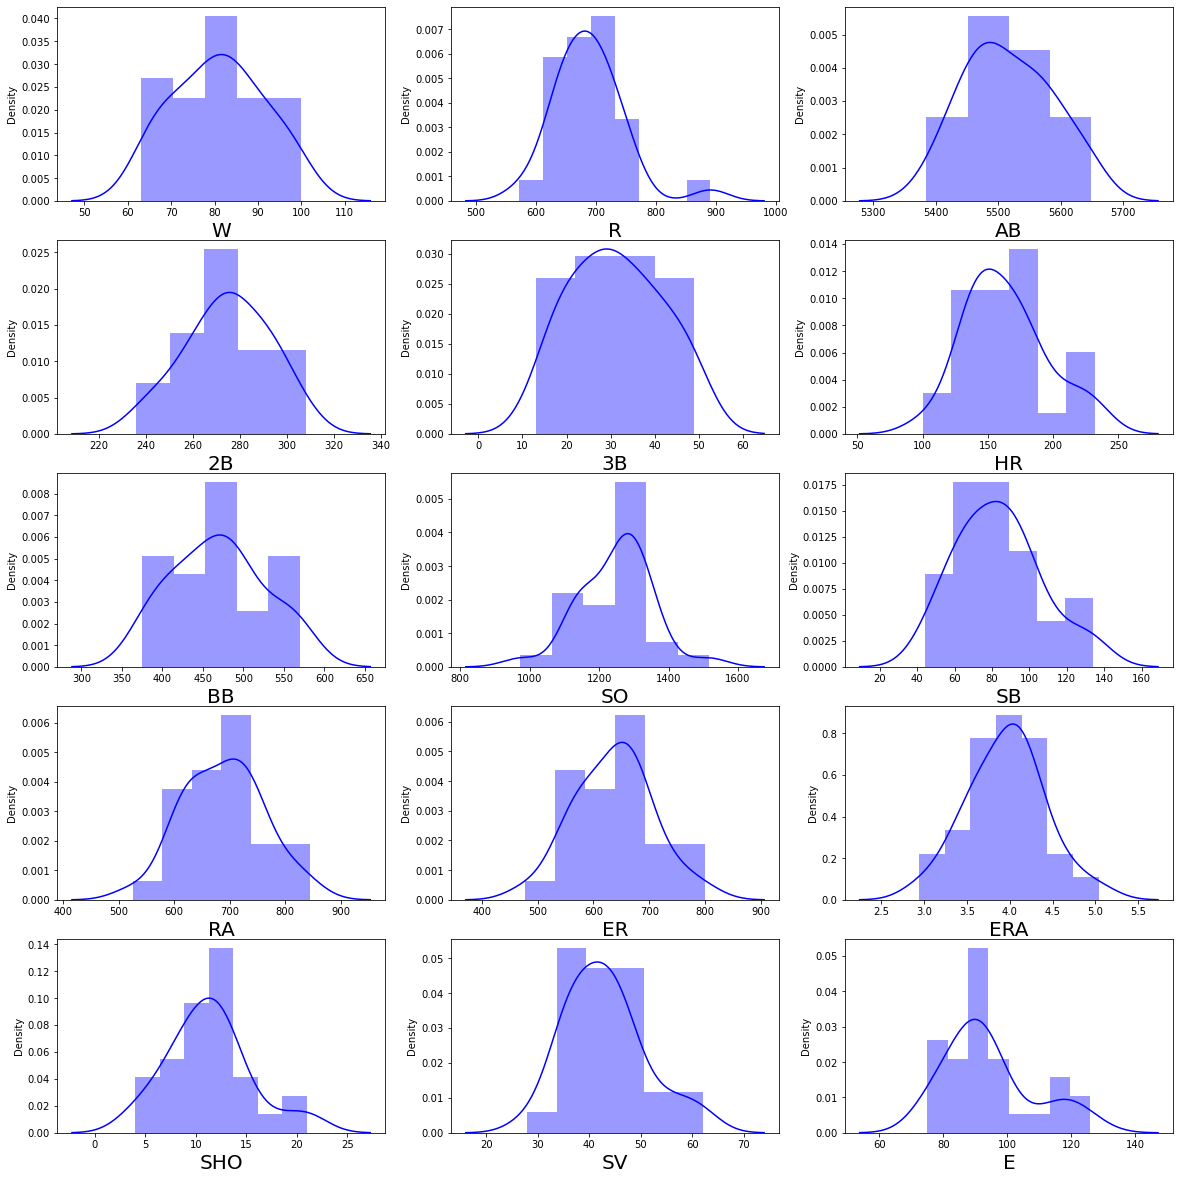

In [44]:
features_skewed = ['SHO','SV','E']
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(data[column],color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

Now the data is normally distributed and the skewness is also removed.

# Data Preprocessing

In [45]:
x = new_data.drop('W',axis=1)
y= new_data['W']

In [46]:
x.shape

(29, 14)

In [47]:
y.shape

(29,)

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,SHO,SV,E
0,0.959398,0.830084,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.787002,1.532753,-0.348265
1,0.331147,-0.702831,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,0.236737,0.312020,-0.540820
2,-0.274666,-1.100253,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,-0.252844,-0.664137,-1.326125
3,-1.329231,0.233951,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,-0.513555,-0.820689,0.650818
4,0.174084,1.255894,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,0.236737,-1.149165,-0.540820
5,1.856900,0.716535,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.126870,0.217866,0.150677,-2.064039,0.677176,0.082858
6,0.712585,-0.447345,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.057451,0.132100,0.194815,-0.252844,0.052325,-1.588197
7,-0.835605,-0.447345,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.650630,-0.468265,-0.489319,0.236737,1.908137,0.237592
8,1.497899,1.752672,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.890486,0.818231,0.768604,-0.252844,-0.365006,0.383386
9,1.565212,-0.078310,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.612808,0.618110,0.614123,-0.513555,0.312020,1.554265


# Multicolinearity

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,6.219825,R
1,9.828077,AB
2,2.683572,2B
3,3.196853,3B
4,7.369072,HR
5,2.686472,BB
6,2.741072,SO
7,1.757901,SB
8,179.096825,RA
9,1754.643859,ER


The VIF values are more than 10 in columns AB, RA, ER, ERA. We can drop highest VIF value that is ER

In [50]:
x.drop('ER', axis=1, inplace=True)

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,4.352902,R
1,3.177214,AB
2,2.597985,2B
3,3.072775,3B
4,4.949255,HR
5,2.561982,BB
6,2.661842,SO
7,1.680467,SB
8,119.939744,RA
9,111.859162,ERA


We can see that multicolinearity still exists, so we can drop column RA as it has high VIF value.

In [52]:
x.drop('RA',axis=1,inplace=True)

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,4.250076,R
1,2.238746,AB
2,2.597917,2B
3,3.030073,3B
4,4.562014,HR
5,2.222720,BB
6,2.042786,SO
7,1.568151,SB
8,3.878177,ERA
9,2.651314,SHO


Now, we can observe that VIF values of all columns are less than 10. Multicolinearity problem is solved.

# Modeling

In [54]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
maxAcc = 0
maxRS = 0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    model = LinearRegression() 
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Maximum r2 score is", maxAcc,"at random state",maxRS)

Maximum r2 score is 0.9291790579976077 at random state 50


In [55]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=maxRS)

# Linear Regression

In [56]:
LR = LinearRegression()
LR.fit(x_train,y_train)

predLR = LR.predict(x_test)
print("R2_score:",r2_score(y_test,predLR))

print("MAE:",metrics.mean_absolute_error(y_test,predLR))

print("MSE:",metrics.mean_squared_error(y_test,predLR))

print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,predLR)))

R2_score: 0.9291790579976077
MAE: 2.4627865987898443
MSE: 10.163242343651952
RMSE 3.187984056367276


The r2_score value of Linear Regression model is 92.91%

# Ridge Regression

In [57]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

paramsRidge = {'alpha':[0.01,0.1,1.0,10.26],'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}
ridge=Ridge()
clf = GridSearchCV(ridge,paramsRidge)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 10.26, 'solver': 'saga'}


In [58]:
ridge = Ridge(alpha=10.26,solver='sag')
ridge.fit(x_train,y_train)

predridge = ridge.predict(x_test)
print("R2_score:",r2_score(y_test,predridge))

print("MAE:",metrics.mean_absolute_error(y_test,predridge))

print("MSE:",metrics.mean_squared_error(y_test,predridge))

print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,predridge)))

R2_score: 0.8233884694622096
MAE: 4.378835740390122
MSE: 25.34484482680587
RMSE 5.034366377887675


The R2 score of Ridge Regressor is 82%

# Lasso Regressor

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
lasso = Lasso()
clf = GridSearchCV(lasso,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [60]:
lasso = Lasso(alpha=1,random_state=0)
lasso.fit(x_train,y_train)

predlasso = lasso.predict(x_test)
print("R2_score:",r2_score(y_test,predlasso))

print("MAE:",metrics.mean_absolute_error(y_test,predlasso))

print("MSE:",metrics.mean_squared_error(y_test,predlasso))

print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,predlasso)))

R2_score: 0.8642951302468397
MAE: 3.8253497504300973
MSE: 19.4744864939597
RMSE 4.41299065192299


The R2 score using Lassi Regressor is 86%

# SGD



In [61]:
from sklearn.linear_model import SGDRegressor

SGD = SGDRegressor()
SGD.fit(x_train,y_train)

predSGD = SGD.predict(x_test)
print("R2_score:",r2_score(y_test,predSGD))

print("MAE:",metrics.mean_absolute_error(y_test,predSGD))

print("MSE:",metrics.mean_squared_error(y_test,predSGD))

print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,predSGD)))

R2_score: 0.9295653221911245
MAE: 2.744741212365088
MSE: 10.107811047535407
RMSE 3.179278384718049


The R2 Score using SGDRegressor is 92.94%

# Cross Validation Score

In [62]:
print("Linear Regressor:-", cross_val_score(LR,x,y,cv=5).mean())
print("Ridge Regressor:-", cross_val_score(ridge,x,y,cv=5).mean())
print("Lasso Regressor:-", cross_val_score(lasso,x,y,cv=5).mean())
print("SGD Regressor:-", cross_val_score(SGD,x,y,cv=5).mean())

Linear Regressor:- 0.37344412304899344
Ridge Regressor:- 0.35015440506640294
Lasso Regressor:- 0.5206537019436117
SGD Regressor:- 0.2662198450494796


From the difference of both R2_score and cross validation score,we can conclude that Lasso best fit model.

# Hyperparameter Tuning

In [63]:
parameters = {'alpha':[0.01,0.1,1.0,10.26],
             'selection':['cyclic','random'],
             'max_iter':[2,4,6,8,10],
             'tol':[100,1000],
             'fit_intercept':['bool']}

In [64]:
GCV = GridSearchCV(Lasso(),parameters,cv=5)

In [65]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.26],
                         'fit_intercept': ['bool'],
                         'max_iter': [2, 4, 6, 8, 10],
                         'selection': ['cyclic', 'random'],
                         'tol': [100, 1000]})

In [66]:
GCV.best_params_

{'alpha': 1.0,
 'fit_intercept': 'bool',
 'max_iter': 10,
 'selection': 'random',
 'tol': 1000}

In [67]:
Baseball = Lasso(alpha=1.0,fit_intercept = 'bool',max_iter=2,selection='random',tol=100)
Baseball.fit(x_train,y_train)
pred = Baseball.predict(x_test)
print('R2_score:',r2_score(y_test,predlasso)*100)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test,predlasso)))

R2_score: 86.42951302468397
RMSE value: 4.41299065192299


After tuning the model, the R2_score is 86.42% for the best model

# Saving The Model

In [68]:
import joblib
joblib.dump(Baseball,'Baseball.pkl')

['Baseball.pkl']

In [69]:
loadmodel = joblib.load('Baseball.pkl')

In [71]:
a = np.array(y_test)
predicted = np.array(loadmodel.predict(x_test))
df_conclusion = pd.DataFrame({"Original":a, "Predicted":predicted}, index=range(len(a)))

df_conclusion

,Original,Predicted
0,68,70.081460
1,78,79.866399
2,74,76.066738
3,88,82.965414
4,68,74.382801
5,64,70.651752
6,92,88.110480
7,90,89.052222
8,100,94.338161


# Prediction Visualization

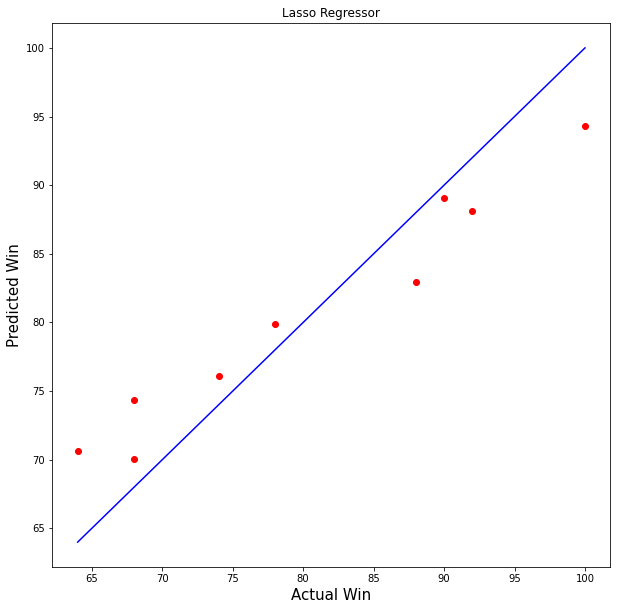

In [72]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,predicted,c='r')
plt1 = max(max(predicted),max(y_test))
plt2 = min(min(predicted),min(y_test))
plt.plot([plt1,plt2],[plt1,plt2],'b-')
plt.xlabel('Actual Win',fontsize=15)
plt.ylabel('Predicted Win',fontsize=15)
plt.title('Lasso Regressor')
plt.show()